In [1]:
import pytorch_lightning as pl
import torch

from ml_aos.lightning import DavidNet, DonutLoader

In [2]:
class LRSearcher(DavidNet):
    """Subclass of DavidNet used to search for the optimal learning rate."""

    def __init__(self, lr: float = 1e-3):
        """
        Parameters
        ----------
        lr: float, default=1e-3
            Learning rate for the Adam optimizer.
        """
        super().__init__()
        self.lr = lr

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=self.lr)

In [3]:
trainer = pl.Trainer(gpus=1, enable_checkpointing=False)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


In [4]:
lr_finder = trainer.tuner.lr_find(LRSearcher(), DonutLoader())

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

Restoring states from the checkpoint path at /phys/users/jfc20/Documents/ml-aos/notebooks/lr_find_temp_model_0be289d2-604f-4564-a4f8-5104f33f497c.ckpt


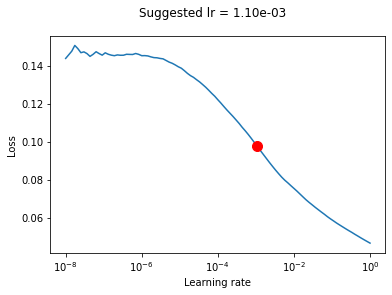

In [5]:
fig = lr_finder.plot(suggest=True)
fig.suptitle(f"Suggested lr = {lr_finder.suggestion():.2e}")
fig.axes[0].set(xticks=[1e-8, 1e-6, 1e-4, 1e-2, 1e-0])
fig.show()

Note this learning rate is for a batch_size of 64 on a single gpu. You should scale the learning rate linearly with the *effective batch size*, which is `batch_size * gpus * num_nodes`.
